<a href="https://colab.research.google.com/github/Guiils/analise_de_dados/blob/main/Projeto_SC_10_03_Guilherme_e_Andrea.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Projeto em Dupla Pandas e MongoDb
* Andrea Pelá
* Guilherme Lins




##Nivel Infra
* O Dataset deve ser salvo em ambiente cloud(Cloud Storage)
* O arquivo original e tratado deve ser salvo em MongoDB Atlas em coleções diferentes
* O Dataset devem ser obrigatoriamente salvos em uma bucket do CloudStorage (Original e Tratado)

##Nivel Pandas
* O arquivo está em outra linguagem e deve ter seus dados traduzidos para Português-BR
* Realizar a extração corretamente para um dataframe
* Verificar a existência de dados inconsistentes e realizar a limpeza para NaN ou NA explicando o porque da decisão
* Realizar o drop(se necessário) de colunas do dataframe realizando o comentário do porque da exclusão 
* Todos os passos devem ser comentados
realizar no mínimo 3 análises apenas numérica
realizar plotagens para no mínimo 4 análises
chegar a uma conclusão ou sugestão 

** Observação** : o que será analisado são os tópicos cumpridos , na ocasião de findar o tempo e algum(ns) não forem contemplados , realize a entrega do que foi concluído . Pedimos que nos conceda acesso ao email professores.bcw4@soulcodeacademy.org para seu projeto no google cloud , adicione um usuário : soulcode  no mongo atlas e compartilhe junto a key de autenticação para acessarmos seu mongo atlas e seja enviado juntamente com o código realizado


##Preparar Bibliotecas

In [ ]:
pip install gcsfs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install pandera

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install pymongo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pymongo
from pymongo import MongoClient
import pandas as pd
import numpy as np
import pandera as pa
import os
from google.cloud import storage

**Conector MongoAtlas**

In [ ]:
uri = "mongodb+srv://projetopandas.llpd4c8.mongodb.net/?authSource=%24external&authMechanism=MONGODB-X509&retryWrites=true&w=majority"
client = MongoClient(uri,tls=True,tlsCertificateKeyFile='/content/X509-cert-6765079240341740868.pem')


##Vinculando o GoogleCloud

Conector Google

In [ ]:
serviceAccount = '/content/projeto-pandas-b72bf82ac36a.json'
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = serviceAccount

## Carregando Arquivos no MongoDB

In [ ]:
df = pd.read_csv(path)

In [ ]:
db = client['bruto']
colecaomarketing = db['marketing_campaign']

In [ ]:
df_dict = df.to_dict('records')

colecaomarketing.insert_many(df_dict)

##Setando o path do arquivo CSV do Colab e Criando DF

In [ ]:
path = 'gs://brutos/marketing_campaign.csv' 

In [ ]:
df = pd.read_csv(path,sep=',',encoding='ISO-8859-1', parse_dates=['Dt_Customer'])

#Tratando o df

In [ ]:
pd.set_option('display.max_columns', 30)

In [ ]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-10-06,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


##Tradução

In [ ]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [ ]:
pd.unique(df['AcceptedCmp4'])


array([0, 1])

In [ ]:
pd.unique(df['AcceptedCmp3'])

array([0, 1])

In [ ]:
pd.unique(df['Z_CostContact']) 

array([3])

In [ ]:
#Configurando a tabela ID como índice

df.set_index('ID', inplace=True)

In [ ]:
df.dtypes

Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
Z_CostContact                   int64
Z_Revenue   

In [ ]:
#Renomeando colunas - Traduzindo
df.rename(columns={
    'Year_Birth':'ano_nascimento',
    'Education':'escolaridade',
    'Marital_Status':'estado_civil',
    'Income':'renda',
    'Kidhome':'qtde_de_criancas',
    'Teenhome':'qtde_de_adolescentes',
    'Dt_Customer':'data_cadastro',
    'MntWines':'gasto_com_vinho',
    'MntFruits':'gasto_com_frutas',
    'NumWebVisitsMonth':'visitas_website_mensal',
    'MntMeatProducts':'gasto_com_carne',
    'MntFishProducts':'gasto_com_peixe',
    'MntSweetProducts':'gasto_com_doces',
    'MntGoldProds':'gasto_com_goldp',
    'NumDealsPurchases':'qtde_compras_desc',
    'NumWebPurchases':'qtde_compras_internet',
    'NumCatalogPurchases':'qtde_compras_catalogo',
    'NumStorePurchases':'qtde_comprasna_loja',
    'NumWebVisitsMonth':'qtde_visita_site_mensal',
    'Complain':'reclamacoes',
    'AcceptedCmp1':'Campanha1',
    'AcceptedCmp2':'Campanha2',
    'AcceptedCmp3':'Campanha3',
    'AcceptedCmp4':'Campanha4',
    'AcceptedCmp5':'Campanha5',
    'Recency':'diasdaultimacompra'
    },inplace=True)


In [ ]:
pd.unique(df['estado_civil']) 

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [ ]:
##Tradução dos termos utilizados na coluna estado_civil

correcoes = { 
    'Single':'Solteiro',
    'Together':'União Estável',
    'Married':'Casado',
    'Divorced':'Divorciado',
    'Widow':'Viuvo',
    'Alone':'Sozinho'
}
  
for key, value in correcoes.items():
  df.loc[df.estado_civil==key,'estado_civil'] = value

In [ ]:
sorted(pd.unique(df['ano_nascimento']))

[1893,
 1899,
 1900,
 1940,
 1941,
 1943,
 1944,
 1945,
 1946,
 1947,
 1948,
 1949,
 1950,
 1951,
 1952,
 1953,
 1954,
 1955,
 1956,
 1957,
 1958,
 1959,
 1960,
 1961,
 1962,
 1963,
 1964,
 1965,
 1966,
 1967,
 1968,
 1969,
 1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996]

In [ ]:
pd.unique(df['escolaridade']) 

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [ ]:
correcoes = { 
    'Graduation':'Graduação',
    'Master':'Mestrado',
    'Basic':'Ensino Fundamental',
    '2n Cycle': 'Segundo Ciclo'
}
  
for key, value in correcoes.items():
  df.loc[df.escolaridade==key,'escolaridade'] = value

#Validação de Dados

In [ ]:
#Variavel para checar se é binário já que algumas colunas do DF só são compostas por 0 e 1 com pandera
checarbin = pa.Check.isin([0,1])
#Criação do schema para validar os dados
schema = pa.DataFrameSchema(
    columns = {
        'ano_nascimento':pa.Column(pa.Int),
        'escolaridade':pa.Column(pa.String),
        'estado_civil':pa.Column(pa.String),
        'renda':pa.Column(pa.Float,nullable=True), # como existiam valores nulos foi utilizado o nullable = True para ignora-los que não iriam ter grande impacto na análise 
        'qtde_de_criancas':pa.Column(pa.Int),
        'qtde_de_adolescentes':pa.Column(pa.Int),
        'data_cadastro':pa.Column(pa.DateTime),
        'diasdaultimacompra':pa.Column(pa.Int),
        'gasto_com_vinho':pa.Column(pa.Int),
        'gasto_com_frutas':pa.Column(pa.Int),
        'gasto_com_carne':pa.Column(pa.Int),
        'gasto_com_peixe':pa.Column(pa.Int),              
        'gasto_com_doces':pa.Column(pa.Int),              
        'gasto_com_goldp':pa.Column(pa.Int),             
        'qtde_compras_desc':pa.Column(pa.Int),            
        'qtde_compras_internet':pa.Column(pa.Int),      
        'qtde_compras_catalogo':pa.Column(pa.Int),       
        'qtde_comprasna_loja':pa.Column(pa.Int),        
        'qtde_visita_site_mensal':pa.Column(pa.Int),      
        'Campanha3':pa.Column(pa.Int,checarbin),                    
        'Campanha4':pa.Column(pa.Int,checarbin),                    
        'Campanha5':pa.Column(pa.Int,checarbin),                    
        'Campanha1':pa.Column(pa.Int,checarbin),                    
        'Campanha2':pa.Column(pa.Int,checarbin),                    
        'reclamacoes':pa.Column(pa.Int,checarbin),                  
        'Z_CostContact':pa.Column(pa.Int),                
        'Z_Revenue':pa.Column(pa.Int),                    
        'Response':pa.Column(pa.Int,checarbin),                     
    })

In [ ]:
schema.validate(df)

,ano_nascimento,escolaridade,estado_civil,renda,qtde_de_criancas,qtde_de_adolescentes,data_cadastro,diasdaultimacompra,gasto_com_vinho,gasto_com_frutas,...,qtde_visita_site_mensal,Campanha3,Campanha4,Campanha5,Campanha1,Campanha2,reclamacoes,Z_CostContact,Z_Revenue,Response
ID,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduação,Solteiro,58138.0,0,0,2012-04-09,58,635,88,...,7,0,0,0,0,0,0,3,11,1
2174,1954,Graduação,Solteiro,46344.0,1,1,2014-08-03,38,11,1,...,5,0,0,0,0,0,0,3,11,0
4141,1965,Graduação,União Estável,71613.0,0,0,2013-08-21,26,426,49,...,4,0,0,0,0,0,0,3,11,0
6182,1984,Graduação,União Estável,26646.0,1,0,2014-10-02,26,11,4,...,6,0,0,0,0,0,0,3,11,0
5324,1981,PhD,Casado,58293.0,1,0,2014-01-19,94,173,43,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10870,1967,Graduação,Casado,61223.0,0,1,2013-06-13,46,709,43,...,5,0,0,0,0,0,0,3,11,0
4001,1946,PhD,União Estável,64014.0,2,1,2014-10-06,56,406,0,...,7,0,0,0,1,0,0,3,11,0
7270,1981,Graduação,Divorciado,56981.0,0,0,2014-01-25,91,908,48,...,6,0,1,0,0,0,0,3,11,0


#Enviando para Cloud Tratado

MongoDB

In [ ]:
db = client['tratado']
colecaomarketing2 = db['marketing_campaign']

In [ ]:
df_dict2 = df.to_dict('records')

colecaomarketing2.insert_many(df_dict2)

GCP

In [ ]:
df.to_csv('gs://tratados/marketing_campaign_tratado.csv', index = False)

##LOAD (Carregamento) salvar o df.

In [ ]:
#Utilizar se for o rotulo padrão 
df.to_csv('cenipa_tratado_ok.csv',index=False)

In [ ]:
#Carregar direto no bucket
df.to_csv('gs://igorgondim01/tratados/cenipa_tratado.csv',index=False)

#Fazendo Análises

In [ ]:
df.describe()

,ano_nascimento,renda,qtde_de_criancas,qtde_de_adolescentes,diasdaultimacompra,gasto_com_vinho,gasto_com_frutas,gasto_com_carne,gasto_com_peixe,gasto_com_doces,...,qtde_visita_site_mensal,Campanha3,Campanha4,Campanha5,Campanha1,Campanha2,reclamacoes,Z_CostContact,Z_Revenue,Response
count,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2237 entries, 5524 to 9405
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ano_nascimento           2237 non-null   int64         
 1   escolaridade             2237 non-null   object        
 2   estado_civil             2237 non-null   object        
 3   renda                    2213 non-null   float64       
 4   qtde_de_criancas         2237 non-null   int64         
 5   qtde_de_adolescentes     2237 non-null   int64         
 6   data_cadastro            2237 non-null   datetime64[ns]
 7   diasdaultimacompra       2237 non-null   int64         
 8   gasto_com_vinho          2237 non-null   int64         
 9   gasto_com_frutas         2237 non-null   int64         
 10  gasto_com_carne          2237 non-null   int64         
 11  gasto_com_peixe          2237 non-null   int64         
 12  gasto_com_doces          2237 n

In [ ]:
dfbackup = df.copy()

In [ ]:
df = dfbackup

## Traçando perfil de clientes

In [ ]:
#Criando coluna Idade 
df['idade'] = 2020 - df['ano_nascimento']
filtroidade = ((df.ano_nascimento > 1933) & (df.ano_nascimento < 1999))
df = df.loc[filtroidade]

In [ ]:
# Gerando uma nova coluna com a quantidade de filhos totais
df['nfilhos'] = df['qtde_de_criancas'] + df['qtde_de_adolescentes']

<ipython-input-59-1a4769d60128>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['nfilhos'] = df['qtde_de_criancas'] + df['qtde_de_adolescentes']


<AxesSubplot:title={'center':'TOTAL DE CLIENTES POR IDADE'}, xlabel='IDADE DOS CLIENTES', ylabel='NUMERO DE PESSOAS'>

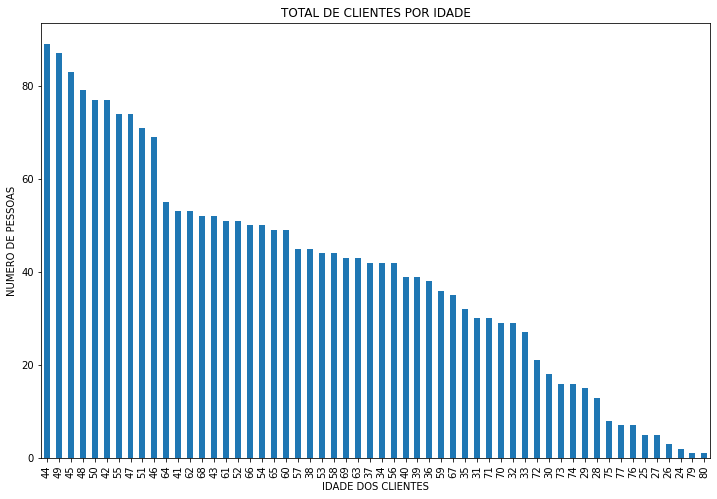

In [ ]:
df.groupby('idade').size().sort_values(ascending=False).plot.bar(figsize=(12,8),xlabel='IDADE DOS CLIENTES',ylabel='NUMERO DE PESSOAS', title = 'TOTAL DE CLIENTES POR IDADE' )

In [ ]:
#Criando um novo df para Verificar o Total Gastos com os Tipos de Produtos
dfgastos = df.loc[:,'gasto_com_vinho':'gasto_com_goldp']

In [ ]:
dfgastos

,gasto_com_vinho,gasto_com_frutas,gasto_com_carne,gasto_com_peixe,gasto_com_doces,gasto_com_goldp
ID,,,,,,
5524,635,88,546,172,88,88
2174,11,1,6,2,1,6
4141,426,49,127,111,21,42
6182,11,4,20,10,3,5
5324,173,43,118,46,27,15
...,...,...,...,...,...,...
10870,709,43,182,42,118,247
4001,406,0,30,0,0,8
7270,908,48,217,32,12,24


In [ ]:
dfgastos.sum()

gasto_com_vinho     680816
gasto_com_frutas     58917
gasto_com_carne     373968
gasto_com_peixe      84057
gasto_com_doces      60621
gasto_com_goldp      98609
dtype: int64

In [ ]:
dfgastos.mean()

gasto_com_vinho     303.995530
gasto_com_frutas     26.270451
gasto_com_carne     166.916853
gasto_com_peixe      37.523022
gasto_com_doces      27.068842
gasto_com_goldp      43.968708
dtype: float64

In [ ]:
dfgastos.max()

gasto_com_vinho     1493
gasto_com_frutas     199
gasto_com_carne     1725
gasto_com_peixe      259
gasto_com_doces      263
gasto_com_goldp      362
dtype: int64

<AxesSubplot:title={'center':'TOTAL DE GASTOS'}, xlabel='Tipos de Gastos', ylabel='Valor Gasto'>

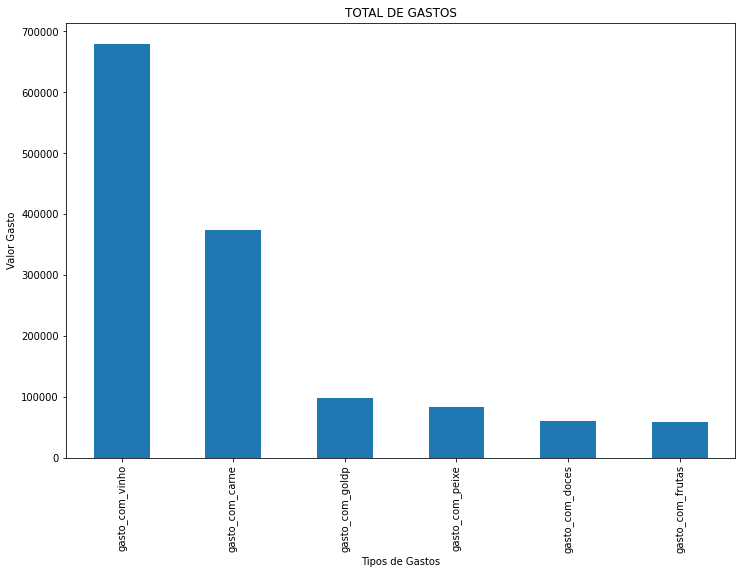

In [ ]:
#Verificando o total de gastos por clientes em cada categoria
dfgastos.sum().sort_values(ascending=False).plot.bar(figsize=(12,8),xlabel='Tipos de Gastos', ylabel='Valor Gasto', title = 'TOTAL DE GASTOS')

In [ ]:
# Criando filtro para as 3 idades que tem mais entradas de dados
filtro44anos = (df['idade'] == 44)

In [ ]:
filtro49anos = (df['idade'] == 49)

In [ ]:
filtro45anos = (df['idade'] == 45)

In [ ]:
# A partir dos filtros criados vamos gerar um novo DF
dffltidade = df.loc[filtro44anos | filtro49anos | filtro45anos]

In [ ]:
dffltidade

,ano_nascimento,escolaridade,estado_civil,renda,qtde_de_criancas,qtde_de_adolescentes,data_cadastro,diasdaultimacompra,gasto_com_vinho,gasto_com_frutas,gasto_com_carne,gasto_com_peixe,gasto_com_doces,gasto_com_goldp,qtde_compras_desc,qtde_compras_internet,qtde_compras_catalogo,qtde_comprasna_loja,qtde_visita_site_mensal,Campanha3,Campanha4,Campanha5,Campanha1,Campanha2,reclamacoes,Z_CostContact,Z_Revenue,Response,idade,nfilhos
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
965,1971,Graduação,Divorciado,55635.0,0,1,2012-11-13,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0,49,1
387,1976,Ensino Fundamental,Casado,7500.0,0,0,2012-11-13,59,6,16,11,11,1,16,1,2,0,3,8,0,0,0,0,0,0,3,11,0,44,0
2404,1976,Graduação,Casado,53359.0,1,1,2013-05-27,4,173,4,30,3,6,41,4,5,1,4,7,0,0,0,0,0,0,3,11,0,44,2
10755,1976,Segundo Ciclo,Casado,23718.0,1,0,2013-02-09,76,6,3,14,15,7,36,3,3,1,2,7,0,0,0,0,0,0,3,11,0,44,1
2139,1975,Mestrado,Casado,7500.0,1,0,2013-02-10,19,3,1,10,3,2,12,3,2,0,3,5,0,0,0,0,0,0,3,11,0,45,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1772,1975,PhD,Casado,79174.0,0,0,2013-11-01,2,1074,37,518,193,92,129,1,5,6,7,2,0,0,1,1,0,0,3,11,1,45,0
4377,1971,Graduação,Casado,52914.0,0,1,2013-07-01,32,254,10,44,30,10,227,2,7,3,3,7,1,0,0,0,0,0,3,11,0,49,1
2656,1971,Graduação,Divorciado,40851.0,1,1,2013-02-21,63,23,1,7,0,4,24,1,1,1,2,7,0,0,0,0,0,0,3,11,0,49,2


In [ ]:
# E a partir do DF criado vamos criar um novo só com a parte de gastos 
dfgastos2 = dffltidade.loc[:,'gasto_com_vinho':'gasto_com_goldp']

In [ ]:
dfgastos2.sum()

gasto_com_vinho     71452
gasto_com_frutas     6293
gasto_com_carne     34013
gasto_com_peixe      9208
gasto_com_doces      6833
gasto_com_goldp      9611
dtype: int64

In [ ]:
dfgastos2.mean()

gasto_com_vinho     275.876448
gasto_com_frutas     24.297297
gasto_com_carne     131.324324
gasto_com_peixe      35.552124
gasto_com_doces      26.382239
gasto_com_goldp      37.108108
dtype: float64

In [ ]:
dfgastos2.max()

gasto_com_vinho     1486
gasto_com_frutas     197
gasto_com_carne      961
gasto_com_peixe      250
gasto_com_doces      194
gasto_com_goldp      232
dtype: int64

<AxesSubplot:title={'center':'TOTAL DE GASTOS'}, xlabel='Tipos de Gastos', ylabel='Valor Gasto'>

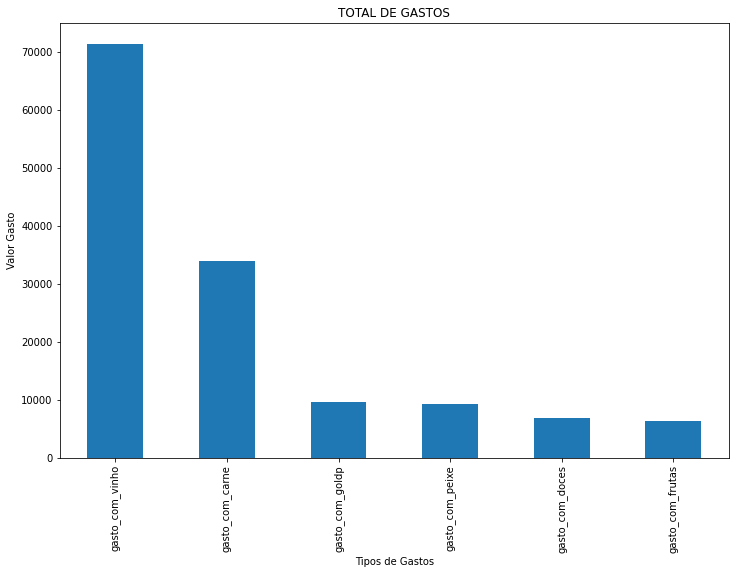

In [ ]:
# Verificação do maior gastos dos clientes de 45, 44 e 49 anos
dfgastos2.sum().sort_values(ascending=False).plot.bar(figsize=(12,8),xlabel='Tipos de Gastos',ylabel='Valor Gasto', title = 'TOTAL DE GASTOS')

In [ ]:
# Criando um novo DF para checar como esse perfil prefere fazer as compras
dftcompra = dffltidade.loc[:,'qtde_compras_internet':'qtde_comprasna_loja']

In [ ]:
dftcompra.sum()

qtde_compras_internet    1001
qtde_compras_catalogo     602
qtde_comprasna_loja      1429
dtype: int64

<AxesSubplot:title={'center':'PREFERENCIA DA FORMA DE FAZER AS COMPRAS'}, xlabel='Modo que fez a Compra', ylabel='Quantidade de Compras'>

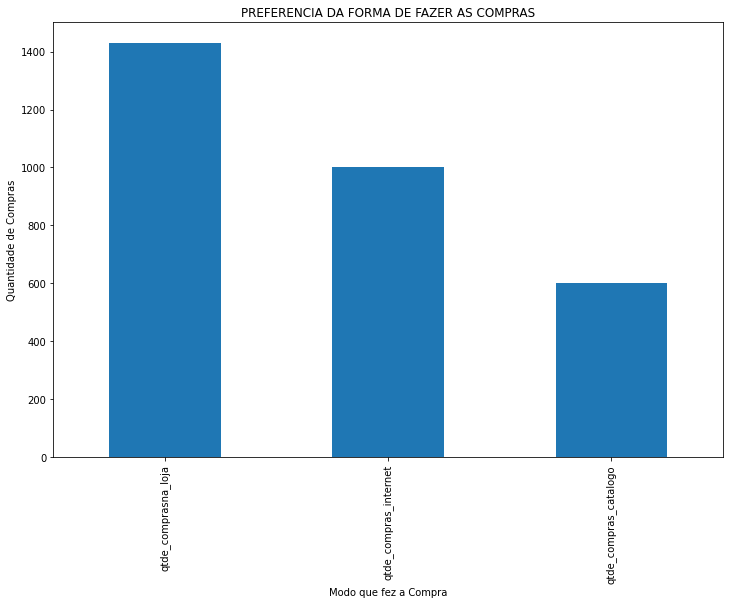

In [ ]:
#Checando por gráfico com a soma de vezes total das formas de compra
dftcompra.sum().sort_values(ascending=False).plot.bar(figsize=(12,8),xlabel='Modo que fez a Compra',ylabel='Quantidade de Compras', title = 'PREFERENCIA DA FORMA DE FAZER AS COMPRAS')

In [ ]:
#Checando numéricamente e por gráfico o agrupamento por escolaridade do perfil traçado
dffltidade.groupby('escolaridade').size()

escolaridade
Ensino Fundamental      3
Graduação             126
Mestrado               53
PhD                    50
Segundo Ciclo          27
dtype: int64

<AxesSubplot:title={'center':'GRAU DE ESCOLARIDADE DO PERFIL'}, xlabel='Escolaridade', ylabel='Pessoas de 44,45 e 49 anos'>

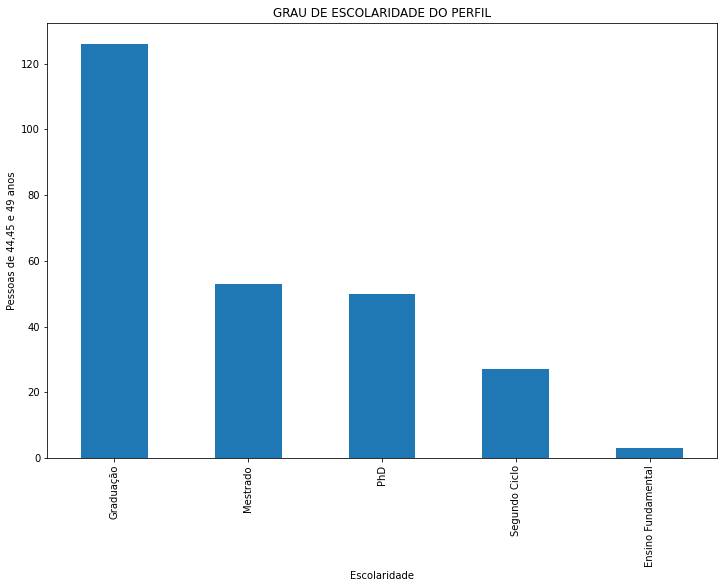

In [ ]:
dffltidade.groupby('escolaridade').size().sort_values(ascending=False).plot.bar(figsize=(12,8),xlabel='Escolaridade',ylabel='Pessoas de 44,45 e 49 anos', title = 'GRAU DE ESCOLARIDADE DO PERFIL')

In [ ]:
#Checando numéricamente e por gráfico o agrupamento por número de filhos do perfil traçado
dffltidade.groupby('nfilhos').size()

nfilhos
0     39
1    156
2     63
3      1
dtype: int64

<AxesSubplot:title={'center':'QUANTIDADE DE FILHOS NO TOTAL REFERENTE AO PERFIL'}, xlabel='Número de filhos', ylabel='Pessoas de 44,45 e 49 anos'>

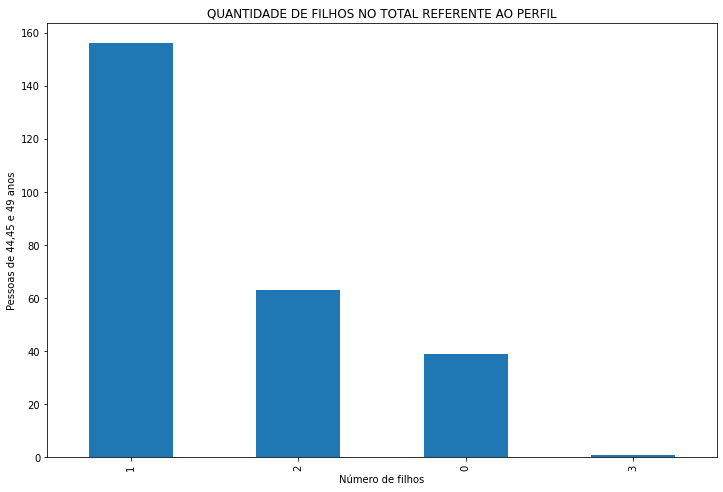

In [ ]:
dffltidade.groupby('nfilhos').size().sort_values(ascending=False).plot.bar(figsize=(12,8),xlabel='Número de filhos',ylabel='Pessoas de 44,45 e 49 anos', title = 'QUANTIDADE DE FILHOS NO TOTAL REFERENTE AO PERFIL')

In [ ]:
#Checando numéricamente e por gráfico o agrupamento por estado civil do perfil traçado
dffltidade.groupby('estado_civil').size()

estado_civil
Casado           100
Divorciado        37
Solteiro          48
União Estável     67
Viuvo              7
dtype: int64

<AxesSubplot:title={'center':'ESTADO CIVIL REFERENTE AO PERFIL'}, xlabel='Estado Civil', ylabel='Pessoas de 44,45 e 49 anos'>

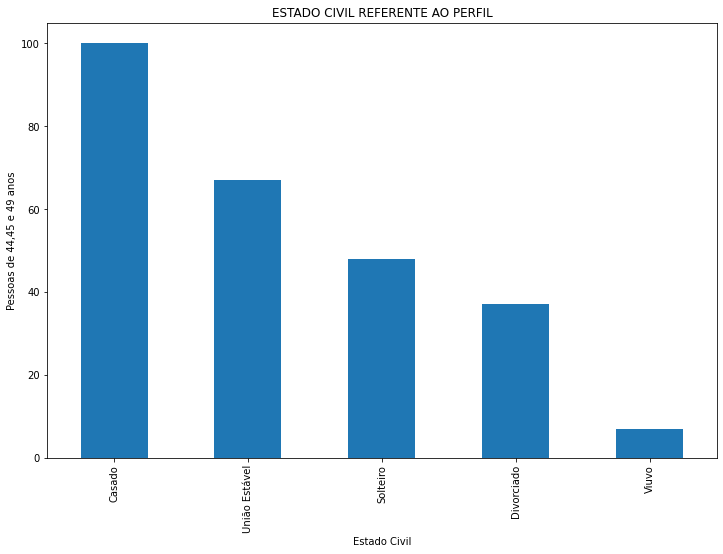

In [ ]:
dffltidade.groupby('estado_civil').size().sort_values(ascending=False).plot.bar(figsize=(12,8),xlabel='Estado Civil',ylabel='Pessoas de 44,45 e 49 anos', title = 'ESTADO CIVIL REFERENTE AO PERFIL')

###Conclusão 1

Percebemos que o perfil das pessoas que tem as 3 maiores entradas de dados é a seguinte:

1. Tem 44,45 e 49 anos
2. A Maioria estava casada em 2020
3. Seu maior gasto é com vinho
4. Preferem fazer a compra diretamente na loja
5. A Maioria tem 1 filho
6. A Maioria Possuí Gradução


Com essas informações podemos criar melhores campanhas de marketing para esse perfil

In [ ]:
#Verificando Estado Civil
df.groupby('estado_civil')

estado_civil
Absurd             2
Casado           864
Divorciado       231
Solteiro         479
Sozinho            3
União Estável    579
Viuvo             77
YOLO               2
dtype: int64

<AxesSubplot:title={'center':'ESTADO CIVIL '}, xlabel='ESTADO CIVIL', ylabel='NÚMERO DE PESSOAS'>

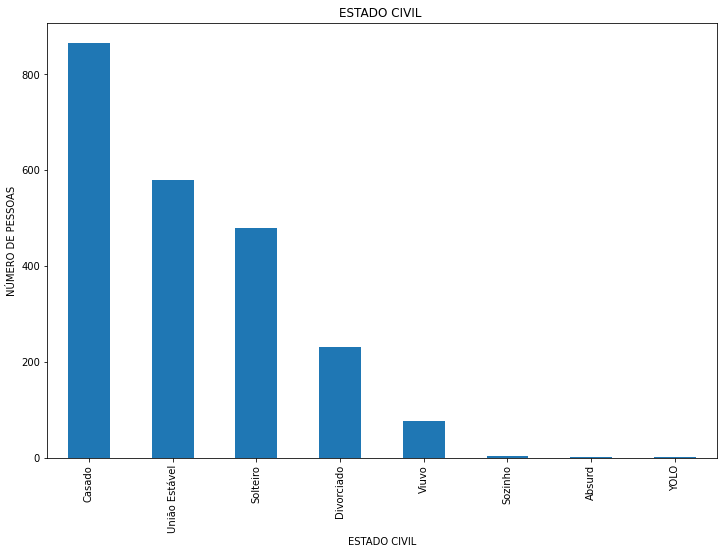

In [ ]:
df.groupby(['estado_civil'],dropna=False).size().sort_values(ascending=False).plot.bar(figsize=(12,8),xlabel='ESTADO CIVIL',ylabel='NÚMERO DE PESSOAS', title = 'ESTADO CIVIL ')

In [ ]:
# Gerando uma nova coluna com a quantidade de filhos totais
df['nfilhos'] = df['qtde_de_criancas'] + df['qtde_de_adolescentes']

In [ ]:
# Análisando a relação da entrada de dados com a quantidade de filhos
df.groupby('nfilhos').size().sort_values(ascending=False)

nfilhos
1    1128
0     638
2     421
3      53
dtype: int64

<AxesSubplot:title={'center':'TOTAL DE FILHOS'}, xlabel='Quantidade de filhos', ylabel='Clientes'>

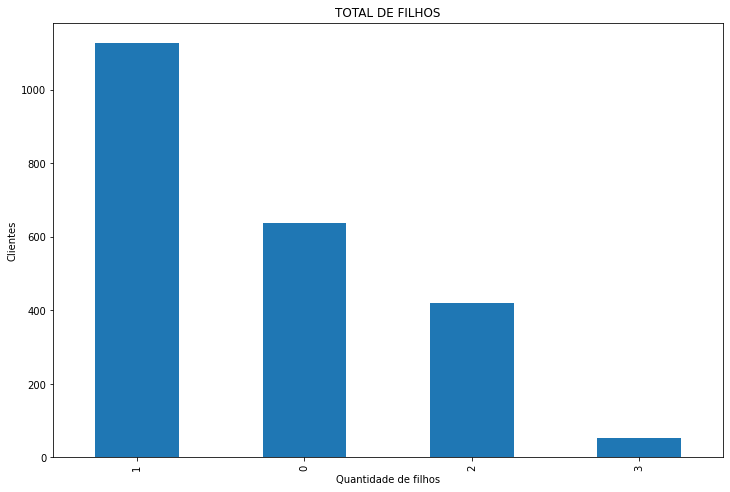

In [ ]:
df.groupby('nfilhos').size().sort_values(ascending=False).plot.bar(figsize=(12,8),xlabel='Quantidade de filhos',ylabel='Clientes', title = 'TOTAL DE FILHOS')

In [ ]:
# Análise da relação entre escolaridade e Renda
df.groupby('escolaridade')['renda'].max().sort_values(ascending=False)

escolaridade
Graduação             666666.0
PhD                   162397.0
Mestrado              157733.0
Segundo Ciclo          96547.0
Ensino Fundamental     34445.0
Name: renda, dtype: float64

In [ ]:
df.groupby('escolaridade')['renda'].mean().sort_values(ascending=False)

escolaridade
PhD                   56145.313929
Mestrado              52917.534247
Graduação             52720.373656
Segundo Ciclo         47633.190000
Ensino Fundamental    20306.259259
Name: renda, dtype: float64

<AxesSubplot:title={'center':'ESCOLARIDADE x RENDA'}, xlabel='ESCOLARIDADE', ylabel='Media Renda'>

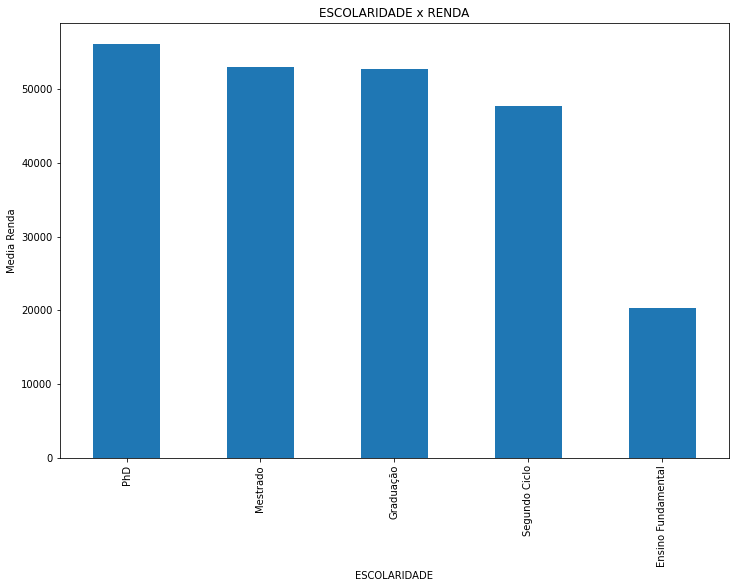

In [ ]:
df.groupby('escolaridade')['renda'].mean().sort_values(ascending=False).plot.bar(figsize=(12,8),xlabel='ESCOLARIDADE',ylabel='Media Renda', title = 'ESCOLARIDADE x RENDA')

In [ ]:
#Analisando a relação entre número de filhos e o gasto com vinho que é o maior gasto geral
df.groupby('nfilhos')['gasto_com_vinho'].sum().sort_values(ascending=False)

nfilhos
0    310901
1    301222
2     59610
3      9083
Name: gasto_com_vinho, dtype: int64

<AxesSubplot:title={'center':'TOTAL GASTO COM VINHO'}, xlabel='QUANTIDADE DE FILHOS', ylabel='Valor Gasto'>

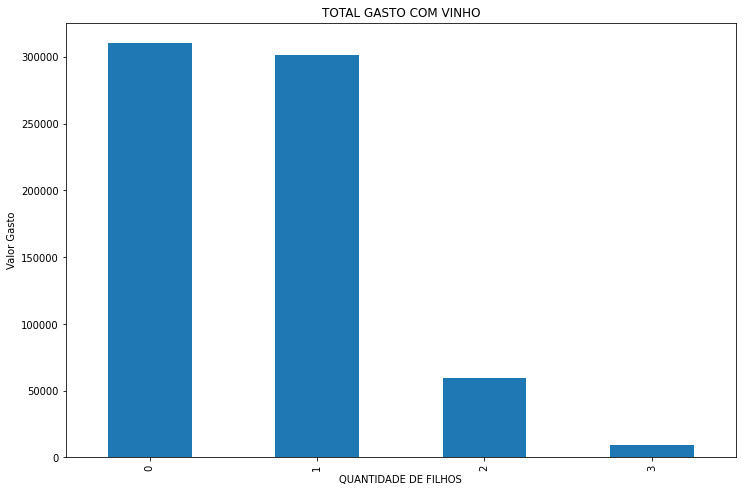

In [ ]:
df.groupby('nfilhos')['gasto_com_vinho'].sum().sort_values(ascending=False).plot.bar(figsize=(12,8),xlabel='QUANTIDADE DE FILHOS',ylabel='Valor Gasto', title = 'TOTAL GASTO COM VINHO')

### Conclusão 2

Podemos perceber que pessoas com até 1 filho consomem muito mais vinho do que as que tem mais de 1 filho

In [ ]:
#Criando um DF Separado para análise das campanhas
dfcampanha = df.loc[:,'Campanha4':'Campanha2']

In [ ]:
dfcampanha

,Campanha4,Campanha5,Campanha1,Campanha2
ID,,,,
5524,0,0,0,0
2174,0,0,0,0
4141,0,0,0,0
6182,0,0,0,0
5324,0,0,0,0
...,...,...,...,...
10870,0,0,0,0
4001,0,0,1,0
7270,1,0,0,0


In [ ]:
# Verficando o sucesso de cada campanha
dfcampanha.sum()

Campanha4    167
Campanha5    162
Campanha1    144
Campanha2     30
dtype: int64

<AxesSubplot:title={'center':'ADESÃO DE CAMPANHA'}, xlabel='Campanha', ylabel='Total de Clientes que aderiram'>

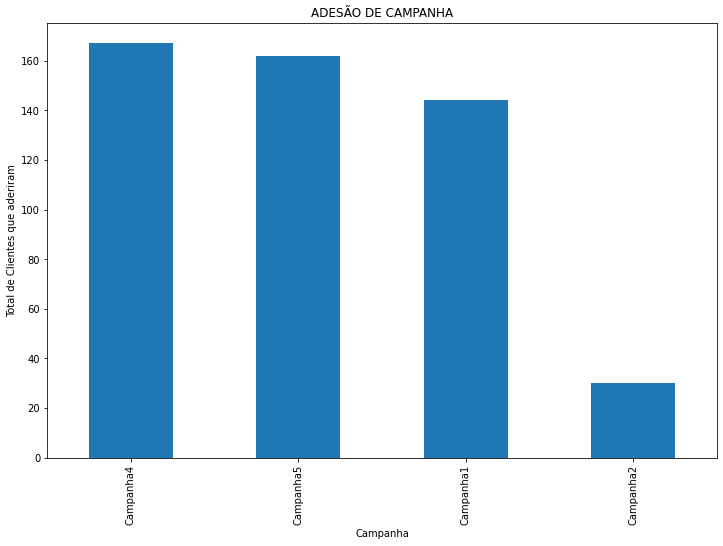

In [ ]:
dfcampanha.sum().sort_values(ascending=False).plot.bar(figsize=(12,8),xlabel='Campanha',ylabel='Total de Clientes que aderiram', title='ADESÃO DE CAMPANHA')

### Conclusão 3

Podemos perceber que nenhuma das campanhas tiveram uma boa aceitação porém entre elas as melhores foram a 4 e 5